## Fig 3 b 

In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results_root = '/data/UKBB/SSL/reports/mtl/100ft/*.csv'
file_list = glob.glob(results_root)

In [3]:
results_root = '/data/UKBB/SSL/reports/mtl/sub_R/*.csv'
sub_r_file_list = glob.glob(results_root)

In [4]:
sub_r_file_list

['/data/UKBB/SSL/reports/mtl/sub_R/pamap_flip_net_ft_10k_postR50_500_-1_5.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/rowlands_flip_net_ft_10k_postR50_500_-1_75.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/pamap_flip_net_ft_10k_postR50_500_-1_75.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/capture24_flip_net_ft_10k_postR50_500_-1_5.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/pamap_flip_net_ft_10k_postR50_500_-1_25.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/capture24_flip_net_ft_10k_postR50_500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/oppo_flip_net_ft_10k_postR50_500_-1_5.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/capture24_flip_net_ft_10k_postR50_500_-1_25.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/oppo_flip_net_ft_10k_postR50_500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/pamap_flip_net_ft_10k_postR50_500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/rowlands_flip_net_ft_10k_postR50_500_-1_5.csv',
 '/data/UKBB/SSL/reports/mtl/sub_R/capture24_flip_net_ft_10k_postR50_500_-1_75.csv',
 '/data/UKBB/SS

In [5]:
file_list

['/data/UKBB/SSL/reports/mtl/100ft/oppo_flip_net_ft_100k_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_ft_100k_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_ft_100_postR60_1500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/pamap_flip_net_ft_100_postR60_1500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/capture24_flip_net_ft_10k_postR50_500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/oppo_flip_net_ft_100_postR60_1500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/oppo_flip_net_ft_10k_postR50_500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/capture24_flip_net_ft_1k_postR60_1500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/pamap_flip_net_ft_10k_postR50_500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/pamap_flip_net_ft_1k_postR50_500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_ft_1k_postR60_1500_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/capture24_flip_net_ft_100k_-1_1.csv',
 '/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_

In [6]:
len(sub_r_file_list)

16

In [7]:
len(file_list)

16

In [8]:
def construct_sub_ratio_master_df(my_file_list):
    master_df = []
    for file_path in my_file_list:
        file_name = file_path.split('/')[-1]
        dataset = file_name.split('_')[0] 
        subject_num = file_name.split('_')[4]
        sub_ratio = file_name.split('_')[-1]
        sub_ratio = sub_ratio.split('.')[0]
        if sub_ratio == '5':
            sub_ratio = 50
        if sub_ratio == '1':
            sub_ratio = 100
        sub_ratio = int(sub_ratio)
        current_df = pd.read_csv(file_path)

        current_df['id'] = current_df.index 
        current_df = pd.melt(current_df, id_vars=['id'])
        current_df.drop(['id'], inplace=True, axis=1)

        current_df['dataset'] = dataset
        current_df['sub_ratio'] = sub_ratio

        if len(master_df) == 0:
            master_df = current_df
        else:
            master_df = pd.concat([master_df, current_df])
    master_df = master_df.rename(columns={"variable": "metric"}) 
    return master_df

In [9]:
master_df = []
for file_path in file_list:
    file_name = file_path.split('/')[-1]
    dataset = file_name.split('_')[0] 
    subject_num = file_name.split('_')[4]
    if subject_num == 'overall':
        subject_num = 10000
    elif subject_num == '100.csv':
        subject_num = 100
    elif subject_num == '1k':
        subject_num = 1000
    elif subject_num == '10k':
        subject_num = 10000
    elif subject_num == '100k':
        subject_num = 100000
    else:
        subject_num = int(subject_num)
    current_df = pd.read_csv(file_path)
    print(file_path)
    print(len(current_df))
    current_df['id'] = current_df.index 
    current_df = pd.melt(current_df, id_vars=['id'])
    current_df.drop(['id'], inplace=True, axis=1)

    current_df['dataset'] = dataset
    current_df['subject'] = subject_num
    
    if len(master_df) == 0:
        master_df = current_df
    else:
        master_df = pd.concat([master_df, current_df])
master_df = master_df.rename(columns={"variable": "metric"}) 

/data/UKBB/SSL/reports/mtl/100ft/oppo_flip_net_ft_100k_-1_1.csv
4
/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_ft_100k_-1_1.csv
55
/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_ft_100_postR60_1500_-1_1.csv
55
/data/UKBB/SSL/reports/mtl/100ft/pamap_flip_net_ft_100_postR60_1500_-1_1.csv
8
/data/UKBB/SSL/reports/mtl/100ft/capture24_flip_net_ft_10k_postR50_500_-1_1.csv
155
/data/UKBB/SSL/reports/mtl/100ft/oppo_flip_net_ft_100_postR60_1500_-1_1.csv
4
/data/UKBB/SSL/reports/mtl/100ft/oppo_flip_net_ft_10k_postR50_500_-1_1.csv
4
/data/UKBB/SSL/reports/mtl/100ft/capture24_flip_net_ft_1k_postR60_1500_-1_1.csv
155
/data/UKBB/SSL/reports/mtl/100ft/pamap_flip_net_ft_10k_postR50_500_-1_1.csv
8
/data/UKBB/SSL/reports/mtl/100ft/pamap_flip_net_ft_1k_postR50_500_-1_1.csv
8
/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_ft_1k_postR60_1500_-1_1.csv
55
/data/UKBB/SSL/reports/mtl/100ft/capture24_flip_net_ft_100k_-1_1.csv
155
/data/UKBB/SSL/reports/mtl/100ft/rowlands_flip_net_ft_10k_postR50_50

In [10]:
np.unique(master_df.metric)

array(['f1', 'kappa', 'precision', 'recall'], dtype=object)

In [11]:
master_df

,metric,value,dataset,subject
0,precision,0.650829,oppo,100000
1,precision,0.499524,oppo,100000
2,precision,0.703497,oppo,100000
3,precision,0.590783,oppo,100000
4,recall,0.760875,oppo,100000
...,...,...,...,...
11,f1,0.642032,oppo,1000
12,kappa,0.480310,oppo,1000
13,kappa,0.400353,oppo,1000
14,kappa,0.304376,oppo,1000


In [12]:
sub_ratio_df = construct_sub_ratio_master_df(sub_r_file_list)

In [13]:
f1_sub_ratio_df = sub_ratio_df[sub_ratio_df['metric'] == 'f1']
f1_sub_ratio_df.loc[f1_sub_ratio_df.metric=='f1', 'sub_ratio'] = f1_sub_ratio_df['sub_ratio'].to_numpy() / 100


/home/cxx579/anaconda3/envs/ssw_env/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [14]:
f1_sub_ratio_df

,metric,value,dataset,sub_ratio
16,f1,0.777131,pamap,0.50
17,f1,0.795815,pamap,0.50
18,f1,0.786550,pamap,0.50
19,f1,0.771621,pamap,0.50
20,f1,0.754058,pamap,0.50
...,...,...,...,...
164,f1,0.880444,rowlands,0.25
8,f1,0.643121,oppo,0.25
9,f1,0.540094,oppo,0.25
10,f1,0.488924,oppo,0.25


In [15]:
df2plot = master_df[(master_df['metric'] == 'f1') |  (master_df['metric'] == 'kappa') ]
recall_df = master_df[master_df['metric'] == 'recall']
f1_df = master_df[master_df['metric'] == 'f1']
kappa_df = master_df[master_df['metric'] == 'kappa']

In [16]:
sns.set_palette('colorblind')

In [17]:
df2plot = df2plot[df2plot['metric'] == 'f1']

In [18]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 4

In [19]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib

matplotlib.rcParams.update({'font.size': 13.})



In [20]:
ibm_platter = ["#000000", "#2271B2", "#3DB7E9", "#F748A5", "#359B73", "#D55E00", "#E69F00"]
sns.set_palette(sns.color_palette(ibm_platter))

sns.color_palette()


[(0.0, 0.0, 0.0),
 (0.13333333333333333, 0.44313725490196076, 0.6980392156862745),
 (0.23921568627450981, 0.7176470588235294, 0.9137254901960784),
 (0.9686274509803922, 0.2823529411764706, 0.6470588235294118),
 (0.20784313725490197, 0.6078431372549019, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.9019607843137255, 0.6235294117647059, 0.0)]

In [21]:
#0d0887,#41049d,#6a00a8,#8f0da4,#b12a90,#cc4778,#e16462,#f2844b,#fca636,#fcce25,#f0f921

In [22]:
ibm_platter = ["#0d0887", "#5302a3", "#8b0aa5", "#b83289", "#db5c68", "#f48849", "#febd2a"]
ibm_platter = ["#b12a90",  "#e16462", "#fca636", "#fcce25",]


sns.set_palette(sns.color_palette(ibm_platter))

sns.color_palette()





[(0.6941176470588235, 0.16470588235294117, 0.5647058823529412),
 (0.8823529411764706, 0.39215686274509803, 0.3843137254901961),
 (0.9882352941176471, 0.6509803921568628, 0.21176470588235294),
 (0.9882352941176471, 0.807843137254902, 0.1450980392156863)]

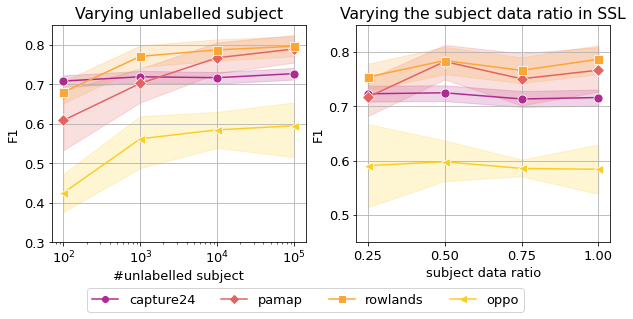

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)

plot_ordering=['capture24', 'pamap', 'rowlands', 'oppo']
sns.lineplot(data=df2plot, x='subject', 
             y='value', hue='dataset', style='dataset', markersize=9,
             hue_order=plot_ordering, style_order=plot_ordering, dashes=False,
             markers=["o", "D", "s", '<'], ax=ax1)
ax1.set_title('Varying unlabelled subject')
ax1.set(xscale='log')
ax1.set(ylabel='F1')
ax1.set_ylim([.3, .85])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


ax1.set(xlabel='#unlabelled subject')

ax1.grid()
# ax1.legend(bbox_to_anchor=(1, -.25), loc='lower center', ncol=6)
ax1.legend(bbox_to_anchor=(1, -.35), loc='lower center', ncol=4)


sns.lineplot(data=f1_sub_ratio_df, x='sub_ratio', y='value', legend=False, markersize=9,
             hue='dataset', style='dataset', style_order=plot_ordering, hue_order=plot_ordering, dashes=False,
             markers=["o", "D", "s", '<'], ax=ax2)

ax2.set(xlabel='subject data ratio')
ax2.set(ylabel='F1')
ax2.set_title('Varying the subject data ratio in SSL')
ax2.xaxis.set_ticks([.25, .5, .75, 1])
ax2.yaxis.set_ticks([.4, .5, .6, .7, .8])
ax2.set_ylim([.45, .85])


ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


ax2.grid()
# plt.tight_layout()


plt.savefig('pretrain_exp.pdf',  dpi=600, bbox_inches = 'tight')
# plt.savefig('imgs/subject_epoch.png', dpi=600)

In [24]:
results_root = '/home/cxx579/ssw/reports/epoch_exp/*.csv'
file_list = glob.glob(results_root)

results_root = '/home/cxx579/ssw/reports/epoch_exp/*.csv'
file_list = glob.glob(results_root)
master_df = []
for file_path in file_list:
    file_name = file_path.split('/')[-1]
    dataset = file_name.split('_')[0]
    epoch_count = file_name.split('_')[-1][:2]
    if epoch_count == '5.':
        epoch_count = '5'
    elif epoch_count == '1.':
        epoch_count = '1'
    elif epoch_count == '0.':
        continue
    current_df = pd.read_csv(file_path)
    
    current_df['id'] = current_df.index 
    current_df = pd.melt(current_df, id_vars=['id'])
    current_df.drop(['id'], inplace=True, axis=1)

    current_df['dataset'] = dataset
    current_df['epoch'] = epoch_count
    
    if len(master_df) == 0:
        master_df = current_df
    else:
        master_df = pd.concat([master_df, current_df])


In [25]:
master_df = master_df.rename(columns={"variable": "metric"}) 
master_df['epoch'] = master_df['epoch'].astype(int)

master_df

,metric,value,dataset,epoch
0,precision,0.772126,pamap,30
1,precision,0.789920,pamap,30
2,precision,0.777375,pamap,30
3,precision,0.807608,pamap,30
4,precision,0.787416,pamap,30
...,...,...,...,...
15,kappa,0.573811,capture24,50
16,kappa,0.587690,capture24,50
17,kappa,0.596397,capture24,50
18,kappa,0.559775,capture24,50


In [28]:
master_df = master_df.rename(columns={"variable": "metric"}) 
master_df['epoch'] = master_df['epoch'].astype(int)

df2plot_epoch = master_df[(master_df['metric'] == 'f1') |  (master_df['metric'] == 'kappa') ]
recall_df = master_df[master_df['metric'] == 'recall']
f1_df = master_df[master_df['metric'] == 'f1']
kappa_df = master_df[master_df['metric'] == 'kappa']

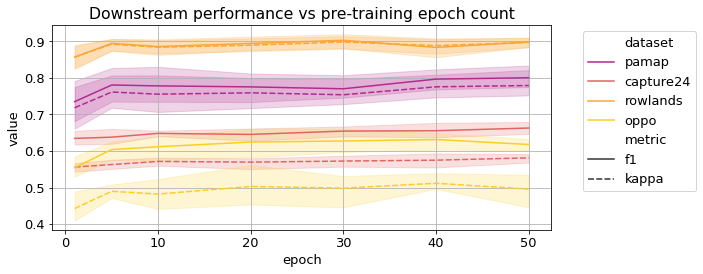

In [29]:
ax = plt.axes()

sns.lineplot(data=df2plot_epoch, x='epoch', y='value', hue='dataset', style='metric')

ax.set_title('Downstream performance vs pre-training epoch count')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid()


# plt.savefig('imgs/epoch.png', dpi=600)